In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from collections import Counter
import re

In [79]:
df_purchase = pd.read_csv("QVI_purchase_behaviour.csv")
df_transaction = pd.read_excel("QVI_transaction_data.xlsx")

In [80]:
df_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


# Check df_purchase data #

In [81]:
# Combined summary
all_summary = df_purchase.describe(include="all")
print(all_summary)


        LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN


In [82]:
# Check df_purchase data

# check any row in any column is nan
nan_rows = df_purchase[df_purchase.isna().any(axis=1)]

# check nan sum in each column
sum_nan_rows = df_purchase.isna().sum()
sum_nan_rows

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

 There is no missing values in purchase data.

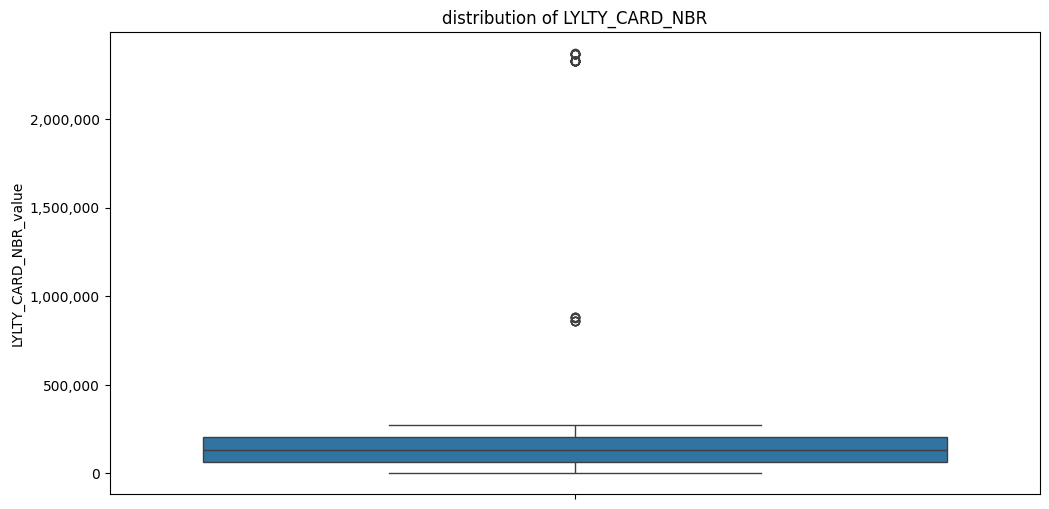

In [83]:
# check outliers

def format_func(value, _):
    return f'{value:,.0f}'  # Format as integers with commas


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_purchase['LYLTY_CARD_NBR'])
plt.title("distribution of LYLTY_CARD_NBR")
plt.ylabel("LYLTY_CARD_NBR_value")

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

We can see that there are some outliers that are outside of the whiskers(top and bottom) in the column

In [84]:
#outlier points
outlier_points = df_purchase[df_purchase['LYLTY_CARD_NBR'] > 500000]
outlier_points

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72603,861921,OLDER SINGLES/COUPLES,Premium
72604,861951,RETIREES,Budget
72605,861961,YOUNG FAMILIES,Budget
72606,862501,YOUNG FAMILIES,Budget
72607,880171,OLDER FAMILIES,Budget
72608,880551,OLDER SINGLES/COUPLES,Premium
72609,880711,OLDER FAMILIES,Budget
72610,883791,OLDER SINGLES/COUPLES,Mainstream
72611,2330031,MIDAGE SINGLES/COUPLES,Premium
72612,2330041,YOUNG SINGLES/COUPLES,Mainstream


In [85]:
#outlier index
idx_outlier = outlier_points.index.to_list()
idx_outlier

[72603,
 72604,
 72605,
 72606,
 72607,
 72608,
 72609,
 72610,
 72611,
 72612,
 72613,
 72614,
 72615,
 72616,
 72617,
 72618,
 72619,
 72620,
 72621,
 72622,
 72623,
 72624,
 72625,
 72626,
 72627,
 72628,
 72629,
 72630,
 72631,
 72632,
 72633,
 72634,
 72635,
 72636]

In [86]:
# Remove the rows from the df that are considered as outliers
df_purchase = df_purchase.drop(index=idx_outlier)
df_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72598,272388,OLDER SINGLES/COUPLES,Premium
72599,272389,YOUNG SINGLES/COUPLES,Mainstream
72600,272390,NEW FAMILIES,Budget
72601,272391,YOUNG SINGLES/COUPLES,Mainstream


In [87]:
df_purchase.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [174]:
# convert LYLTY_CARD_NBR to object
df_purchase["LYLTY_CARD_NBR"] = df_purchase["LYLTY_CARD_NBR"].astype(str)

In [88]:
# save the clean df_purchase
df_purchase.to_csv("clean_QVI_purchase_behaviour.csv")

# Check df_transaction #

In [89]:
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [90]:
# need to check if each row is really chip product related.
# we need to target PROD_NAME to check

# Clean the 'PROD_NAME' column: remove digits and special characters
df_transaction['New_PROD_NAME'] = df_transaction['PROD_NAME'].str.replace(r"[^a-zA-Z\s]", "",regex=True)

unique_list = df_transaction['New_PROD_NAME'].unique()

cleaned_unique_list = [re.sub(r'\s+', ' ', word).strip() for word in unique_list]

all_words = " ".join(cleaned_unique_list)
word_list = all_words.split()
filtered_word_list = [word for word in word_list if len(word) > 2]


word_counts = Counter(filtered_word_list)
word_counts

Counter({'Chips': 21,
         'Smiths': 16,
         'Crinkle': 14,
         'Cut': 14,
         'Kettle': 13,
         'Cheese': 12,
         'Salt': 12,
         'Original': 10,
         'Chip': 9,
         'Salsa': 9,
         'Doritos': 9,
         'Corn': 8,
         'Pringles': 8,
         'RRD': 8,
         'Chicken': 7,
         'Chilli': 6,
         'Sour': 6,
         'Sea': 6,
         'Thinly': 5,
         'Vinegar': 5,
         'Thins': 5,
         'Crisps': 5,
         'Natural': 4,
         'Cream': 4,
         'Red': 4,
         'Rock': 4,
         'Deli': 4,
         'Supreme': 4,
         'Infuzions': 4,
         'CCs': 3,
         'Tortilla': 3,
         'Old': 3,
         'Paso': 3,
         'Dip': 3,
         'Tomato': 3,
         'Mild': 3,
         'Sweet': 3,
         'Sensations': 3,
         'Lime': 3,
         'Twisties': 3,
         'Chives': 3,
         'Soy': 3,
         'Cobs': 3,
         'Popd': 3,
         'Woolworths': 3,
         'Tostitos': 3,
    

In [ ]:
# negative order word count
negative_word_counts = sorted(word_counts.items(), key=lambda x: x[1])
negative_word_counts

 There are products that are not chips such as salsa

In [91]:
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g


In [92]:
word_to_exluce = 'Salsa'
# not case insenitive, ensure nan values wont raise error
df_transaction = df_transaction[~df_transaction["New_PROD_NAME"].str.contains(word_to_exluce, case=False, na=False)]
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g


In [93]:
# check nan sum in each column

sum_nan_rows = df_transaction.isna().sum()
sum_nan_rows

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
New_PROD_NAME     0
dtype: int64

No missing values

In [94]:
# Combined summary
all_summary = df_transaction.describe(include="all")
print(all_summary)

                 DATE      STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   246742.000000  246742.000000    2.467420e+05  2.467420e+05   
unique            NaN            NaN             NaN           NaN   
top               NaN            NaN             NaN           NaN   
freq              NaN            NaN             NaN           NaN   
mean     43464.054875     135.051098    1.355310e+05  1.351311e+05   
std        105.396691      76.787096    8.071528e+04  7.814772e+04   
min      43282.000000       1.000000    1.000000e+03  1.000000e+00   
25%      43373.000000      70.000000    7.001500e+04  6.756925e+04   
50%      43464.000000     130.000000    1.303670e+05  1.351830e+05   
75%      43555.000000     203.000000    2.030840e+05  2.026538e+05   
max      43646.000000     272.000000    2.373711e+06  2.415841e+06   

             PROD_NBR                               PROD_NAME       PROD_QTY  \
count   246742.000000                                  246742  246742.000000   

In [95]:
# check data type
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
New_PROD_NAME      object
dtype: object

In [96]:
# convert Date to datetime64[ns] type
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')

/var/folders/85/p4y2sn8d0tq9c28r3btcp_8h0000gn/T/ipykernel_68018/1236630321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'], origin='1899-12-30', unit='D')


In [97]:
df_transaction.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
New_PROD_NAME             object
dtype: object

In [98]:
df_transaction["STORE_NBR"] = df_transaction["STORE_NBR"].astype("category")

df_transaction["LYLTY_CARD_NBR"] = df_transaction["LYLTY_CARD_NBR"].astype("str")

df_transaction["TXN_ID"] = df_transaction["TXN_ID"].astype("str")

df_transaction["PROD_NBR"] = df_transaction["PROD_NBR"].astype("str")

df_transaction["PROD_NAME"] = df_transaction["PROD_NAME"].astype("category")


/var/folders/85/p4y2sn8d0tq9c28r3btcp_8h0000gn/T/ipykernel_68018/4270558496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction["STORE_NBR"] = df_transaction["STORE_NBR"].astype("category")
/var/folders/85/p4y2sn8d0tq9c28r3btcp_8h0000gn/T/ipykernel_68018/4270558496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction["LYLTY_CARD_NBR"] = df_transaction["LYLTY_CARD_NBR"].astype("str")
/var/folders/85/p4y2sn8d0tq9c28r3btcp_8h0000gn/T/ipykernel_68018/4270558496.py:5: SettingWithCopy

In [99]:
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g


In [100]:
df_transaction.dtypes

DATE              datetime64[ns]
STORE_NBR               category
LYLTY_CARD_NBR            object
TXN_ID                    object
PROD_NBR                  object
PROD_NAME               category
PROD_QTY                   int64
TOT_SALES                float64
New_PROD_NAME             object
dtype: object

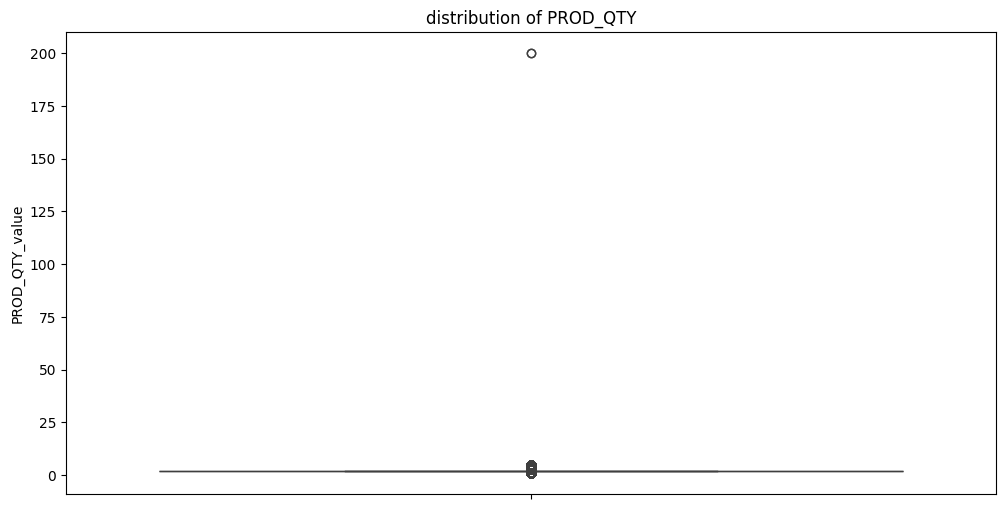

In [101]:
# check outliers
# PROD_QTY

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transaction['PROD_QTY'])
plt.title("distribution of PROD_QTY")
plt.ylabel("PROD_QTY_value")

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

 Have 2 outliers

In [102]:
outlier_points = df_transaction[df_transaction['PROD_QTY'] > 50]
outlier_points

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Dorito Corn Chp Supreme g


In [103]:
#outlier index
idx_outlier = outlier_points.index.to_list()
idx_outlier

[69762, 69763]

In [104]:
# Remove the rows from the df that are considered as outliers
df_transaction = df_transaction.drop(index=idx_outlier)
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g


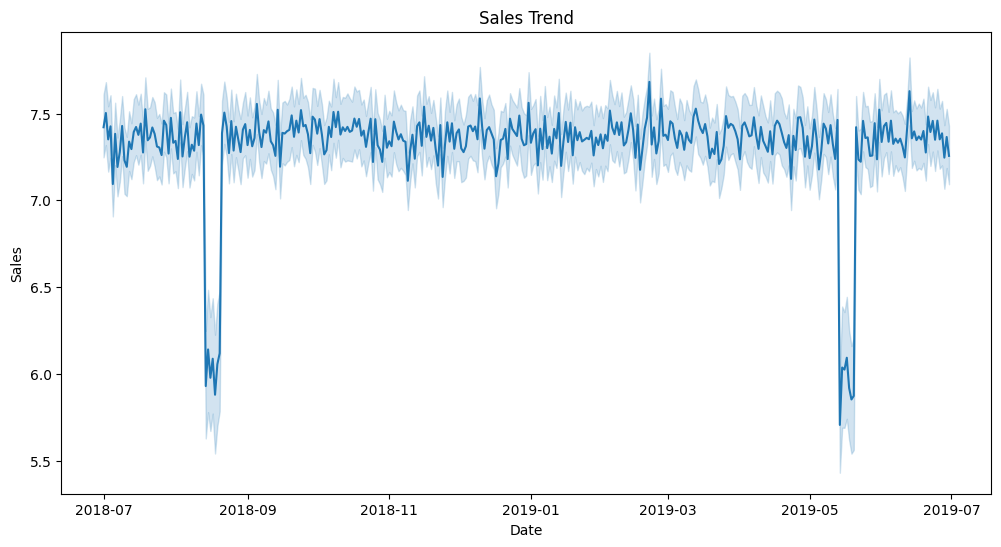

In [105]:
# check the sales by date

plt.figure(figsize=(12,6))
sns.lineplot(x=df_transaction['DATE'], y=df_transaction['TOT_SALES'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend")

plt.show()

number of sales is at peak in december

the sales is decreasing in august and june.

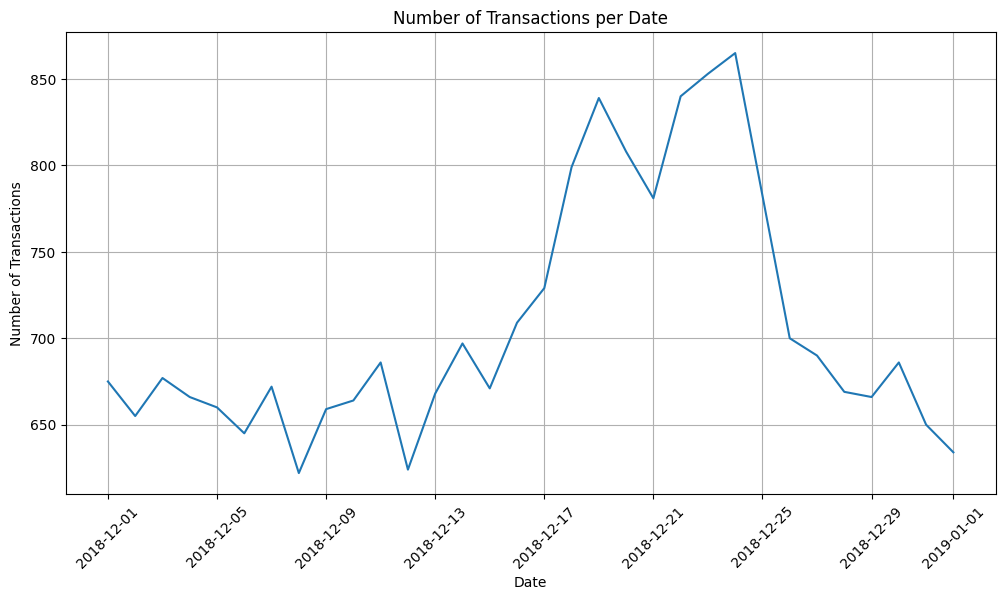

In [110]:
# check the number of sales by date

# count the transcation by dates
# group by date and use size() to count

start_date = '2018-12-01'
end_date = '2019-01-01'
dec_df_transaction = df_transaction[ (df_transaction["DATE"] >= start_date)  & (df_transaction["DATE"] <= end_date)]

transactions_per_date = dec_df_transaction.groupby("DATE").size().reset_index(name="Transaction_Count")

plt.figure(figsize=(12,6))
sns.lineplot(x=transactions_per_date['DATE'], y=transactions_per_date['Transaction_Count'])
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Number of Transactions per Date")
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

the number of sales is at peak around the end of year

In [111]:
# check pack size
# Extract the first sequence of digits
df_transaction["pack_size"] = df_transaction["PROD_NAME"].str.extract("(\d+)")
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150


In [117]:
temp = df_transaction["pack_size"].value_counts()
# Transform `temp` into a DataFrame for easier plotting
pack_size_counts = temp.reset_index()

pack_size_counts.columns = ['pack_size', 'count']  # Rename columns
pack_size_counts

,pack_size,count
0,175,66390
1,150,40203
2,134,25102
3,110,22387
4,170,19983
5,165,15297
6,330,12540
7,380,6416
8,270,6285
9,210,6272


In [130]:
pack_size_counts['pack_size'] = pd.to_numeric(pack_size_counts['pack_size'])
sorted_pack_size_counts = pack_size_counts.sort_values(by="pack_size")


print(len(sorted_pack_size_counts))

20


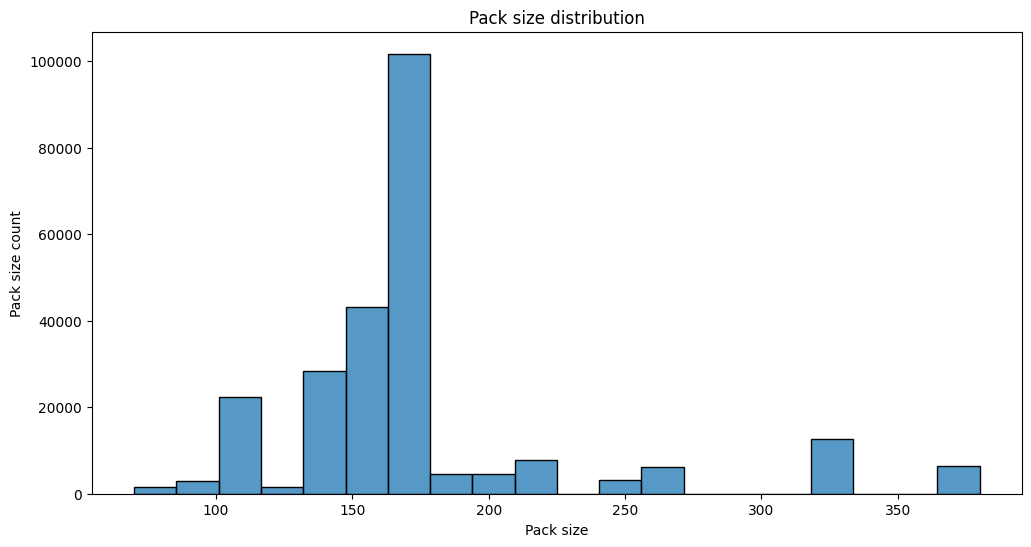

In [131]:
# check pack size distribution

plt.figure(figsize=(12, 6))
sns.histplot(data=sorted_pack_size_counts,x='pack_size', weights='count',kde=False, bins=20)
plt.title("Pack size distribution")
plt.xlabel("Pack size")
plt.ylabel("Pack size count")
plt.show()

In [134]:
#  extract  brand  name - first word in the prod name is always a brand name
df_transaction['Brand'] =df_transaction['PROD_NAME'].str.split().str[0]
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos


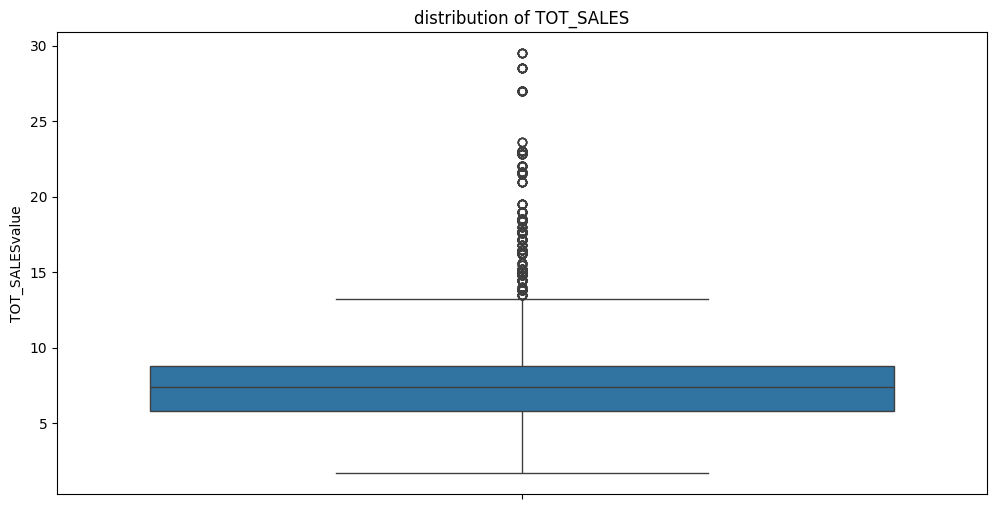

In [165]:
# check outliers
# TOT_SALES

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_transaction['TOT_SALES'])
plt.title("distribution of TOT_SALES")
plt.ylabel("TOT_SALESvalue")

# Apply formatter to y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

plt.show()

Remove anything above 15 as outliers

In [166]:
outlier_points = df_transaction[df_transaction['TOT_SALES'] > 15]
outlier_points

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand
11,2018-08-20,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,Kettle Sensations Siracha Lime g,150,Kettle
56,2019-05-16,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5,GrnWves Plus Btroot Chilli Jam g,180,GrnWves
72,2018-08-19,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5,Smiths Crinkle Original g,330,Smiths
100,2019-05-20,130,130108,134125,2,Cobs Popd Sour Crm &Chives Chips 110g,5,19.0,Cobs Popd Sour Crm Chives Chips g,110,Cobs
102,2019-05-15,133,133250,137666,30,Doritos Corn Chips Cheese Supreme 170g,4,17.6,Doritos Corn Chips Cheese Supreme g,170,Doritos
...,...,...,...,...,...,...,...,...,...,...,...
258659,2018-08-18,123,123246,127077,104,Infuzions Thai SweetChili PotatoMix 110g,4,15.2,Infuzions Thai SweetChili PotatoMix g,110,Infuzions
258715,2018-08-16,194,194381,194835,102,Kettle Mozzarella Basil & Pesto 175g,4,21.6,Kettle Mozzarella Basil Pesto g,175,Kettle
258721,2018-08-15,200,200248,199694,3,Kettle Sensations Camembert & Fig 150g,4,18.4,Kettle Sensations Camembert Fig g,150,Kettle
258726,2018-08-20,203,203253,203360,28,Thins Potato Chips Hot & Spicy 175g,5,16.5,Thins Potato Chips Hot Spicy g,175,Thins


In [167]:
#outlier index
idx_outlier = outlier_points.index.to_list()

In [168]:
# Remove the rows from the df that are considered as outliers
df_transaction = df_transaction.drop(index=idx_outlier)
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle
...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos


In [175]:
# merge transaction and purchase data
# merge based on LYLTY_CARD_NBR

df_merge = pd.merge(df_transaction, df_purchase, how="left", on="LYLTY_CARD_NBR")
df_merge

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,New_PROD_NAME,pack_size,Brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Compny SeaSaltg,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs Nacho Cheese g,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths Crinkle Cut Chips Chicken g,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths Chip Thinly SCreamOnion g,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle Tortilla ChpsHnyJlpno Chili g,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246237,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle Sweet Chilli And Sour Cream g,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246238,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos Splash Of Lime g,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246239,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos Mexicana g,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246240,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos Corn Chip Mexican Jalapeno g,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [185]:
# calculate the total sales by LIFESTAGE and PREMIUM_CUSTOMER
total_sales_by_life_premium = df_merge.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum()
total_sales_by_life_premium = total_sales_by_life_premium.reset_index()

total_sales_sum = total_sales_by_life_premium['TOT_SALES'].sum()

total_sales_by_life_premium["sales_ratio_percent"] = (total_sales_by_life_premium["TOT_SALES"] / total_sales_sum) * 100
total_sales_by_life_premium

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,sales_ratio_percent
0,MIDAGE SINGLES/COUPLES,Budget,33152.80,1.847047
1,MIDAGE SINGLES/COUPLES,Mainstream,84161.30,4.688891
2,MIDAGE SINGLES/COUPLES,Premium,54161.55,3.017511
3,NEW FAMILIES,Budget,20541.25,1.144418
4,NEW FAMILIES,Mainstream,15921.45,0.887034
5,NEW FAMILIES,Premium,10720.20,0.597256
6,OLDER FAMILIES,Budget,155855.25,8.683187
7,OLDER FAMILIES,Mainstream,95798.20,5.337220
8,OLDER FAMILIES,Premium,74752.30,4.164686
9,OLDER SINGLES/COUPLES,Budget,126952.60,7.072929


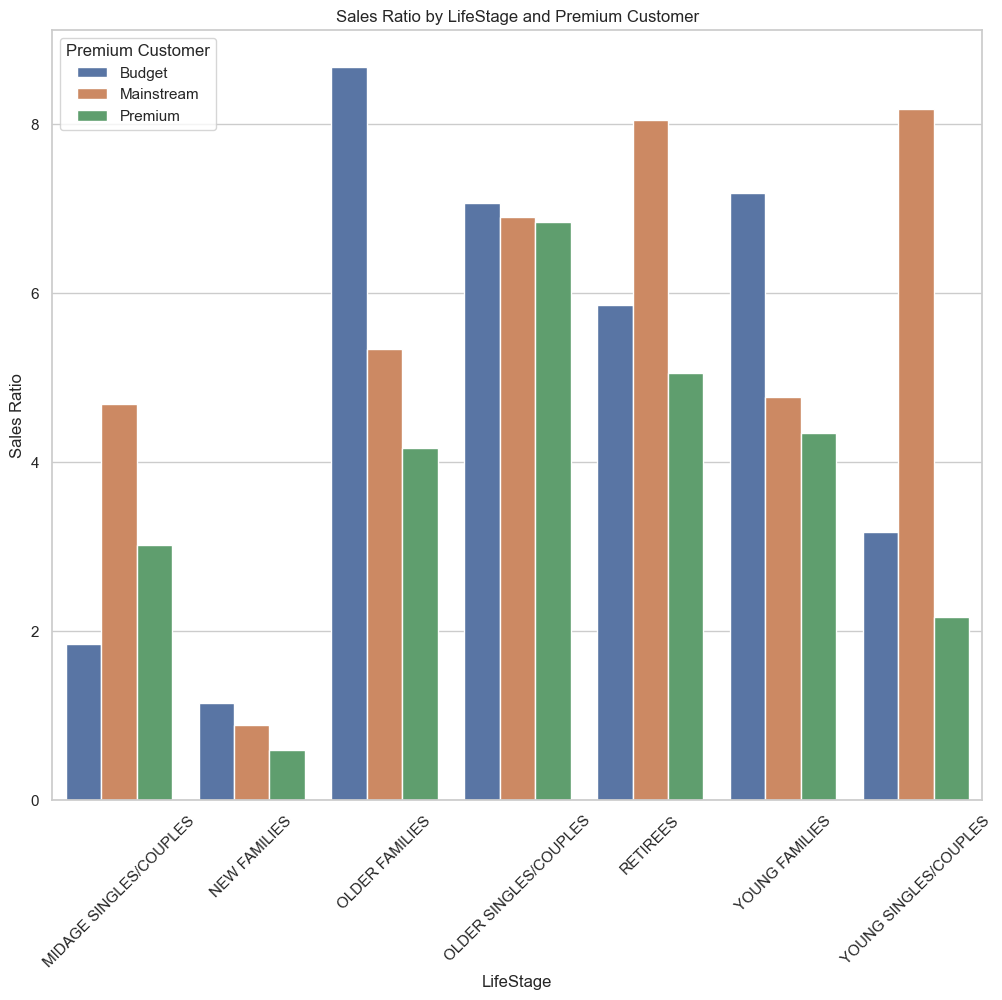

In [191]:
# make a bar graph to represent Sales Ratio by LifeStage and Premium Customer

sns.set(style="whitegrid")

plt.figure(figsize=(12,10))
sns.barplot(x="LIFESTAGE", y="sales_ratio_percent", hue="PREMIUM_CUSTOMER", data=total_sales_by_life_premium)

plt.title('Sales Ratio by LifeStage and Premium Customer')
plt.xlabel('LifeStage')
plt.ylabel('Sales Ratio')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer')
plt.tight_layout

plt.show()

There are more mainstream in retiree and young singles/couples who buy chips.


In [196]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

price_unit_by_life_premium = df_merge.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])[["TOT_SALES", "PROD_QTY"]].sum()xw
price_unit_by_life_premium = price_unit_by_life_premium.reset_index()
price_unit_by_life_premium["price_unit"] =  price_unit_by_life_premium["TOT_SALES"] / price_unit_by_life_premium["PROD_QTY"]
price_unit_by_life_premium

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,price_unit
0,MIDAGE SINGLES/COUPLES,Budget,33152.80,8836,3.752014
1,MIDAGE SINGLES/COUPLES,Mainstream,84161.30,21090,3.990578
2,MIDAGE SINGLES/COUPLES,Premium,54161.55,14339,3.777219
3,NEW FAMILIES,Budget,20541.25,5228,3.929084
4,NEW FAMILIES,Mainstream,15921.45,4045,3.936082
5,NEW FAMILIES,Premium,10720.20,2760,3.884130
6,OLDER FAMILIES,Budget,155855.25,41636,3.743281
7,OLDER FAMILIES,Mainstream,95798.20,25668,3.732204
8,OLDER FAMILIES,Premium,74752.30,20125,3.714400
9,OLDER SINGLES/COUPLES,Budget,126952.60,32689,3.883649


In [46]:
# save the clean df_purchase
df_transaction.to_csv("clean_QVI_transaction_data.xlsx.csv")

In [149]:
!git remote -v

origin	https://github.com/pandaueno0156/Exploratory_Data_Analysis_ChipCompany (fetch)
origin	https://github.com/pandaueno0156/Exploratory_Data_Analysis_ChipCompany (push)


In [138]:
!git init


Initialized empty Git repository in /Users/kunisukeishigaki/Desktop/Data Science/Quantium_course/.git/


In [150]:
!git remote add origin https://github.com/pandaueno0156/Exploratory_Data_Analysis_ChipCompany


error: remote origin already exists.


In [158]:
!git remote -v

origin	https://github.com/pandaueno0156/Exploratory_Data_Analysis_ChipCompany (fetch)
origin	https://github.com/pandaueno0156/Exploratory_Data_Analysis_ChipCompany (push)


In [159]:
!git add "QVI_purchase_behaviour.csv"

In [160]:
!git add "QVI_transaction_data.xlsx"

In [161]:
!git commit -m"original data update"

On branch main
Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	EDA.ipynb
	EDA.pdf
	clean_QVI_purchase_behaviour.csv
	clean_QVI_transaction_data.xlsx.csv

nothing added to commit but untracked files present (use "git add" to track)


In [162]:
!git branch -M main  # Rename default branch to 'main'


In [164]:
!git push -u origin main
pandaueno0156

Username for 'https://github.com': ^C


NameError: name 'pandaueno0156' is not defined

In [ ]:
pandaueno0156

In [ ]:
Ff3367521

In [148]:
!git config --global credential.helper store